In [ ]:
pip install scikit-optimize

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
from collections import deque
import matplotlib.pyplot as plt
from itertools import product
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import differential_evolution
# from bayes_opt import BayesianOptimization
import numpy as np
from collections import defaultdict
from typing import Dict, List, Tuple

In [138]:
df = pd.read_csv("/content/retail_price.csv")
df.head(2)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.0,4.4,8.760,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.0,4.4,21.322,45.95,4.0,12.933333,45.95


In [6]:
df['month_year'].values

array(['01-05-2017', '01-06-2017', '01-07-2017', '01-08-2017',
       '01-09-2017', '01-10-2017', '01-11-2017', '01-12-2017',
       '01-01-2018', '01-02-2018', '01-03-2018', '01-04-2018',
       '01-05-2018', '01-06-2018', '01-07-2018', '01-08-2018',
       '01-03-2017', '01-04-2017', '01-05-2017', '01-06-2017',
       '01-07-2017', '01-08-2017', '01-09-2017', '01-10-2017',
       '01-11-2017', '01-12-2017', '01-01-2018', '01-02-2018',
       '01-03-2018', '01-04-2018', '01-07-2017', '01-08-2017',
       '01-09-2017', '01-10-2017', '01-11-2017', '01-12-2017',
       '01-02-2018', '01-03-2018', '01-04-2018', '01-05-2018',
       '01-06-2018', '01-07-2018', '01-04-2017', '01-05-2017',
       '01-07-2017', '01-08-2017', '01-09-2017', '01-10-2017',
       '01-11-2017', '01-12-2017', '01-01-2018', '01-02-2018',
       '01-03-2018', '01-04-2018', '01-05-2018', '01-06-2018',
       '01-07-2018', '01-08-2018', '01-02-2017', '01-03-2017',
       '01-04-2017', '01-05-2017', '01-06-2017', '01-07

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


<Figure size 1200x600 with 0 Axes>

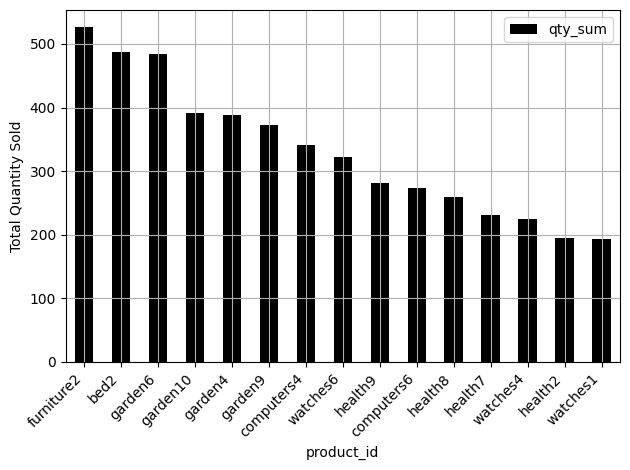

In [ ]:
# Group by product_id and calculate key metrics
product_stats = df.groupby('product_id').agg({
    'qty': ['sum', 'mean', 'std'],
    'unit_price': ['mean', 'std'],
    'total_price': 'sum',
    'month_year': ['min', 'max', 'nunique']  }).reset_index()

product_stats.columns = ['_'.join(col).strip() for col in product_stats.columns.values]
product_stats = product_stats.rename(columns={'product_id_': 'product_id'})

product_stats['total_revenue'] = product_stats['total_price_sum']
product_stats['avg_order_size'] = product_stats['qty_mean']
product_stats['price_variability'] = product_stats['unit_price_std'] / product_stats['unit_price_mean']
product_stats['sales_cv'] = product_stats['qty_std'] / product_stats['qty_mean']  # Coefficient of variation

top_products = product_stats.sort_values('qty_sum', ascending=False)
# print(top_products.head())

# Visualization (top 15 products by total quantity)
plt.figure(figsize=(12, 6))
top_products.head(15).plot(x='product_id', y='qty_sum', kind='bar', color='k')
plt.ylabel('Total Quantity Sold')
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

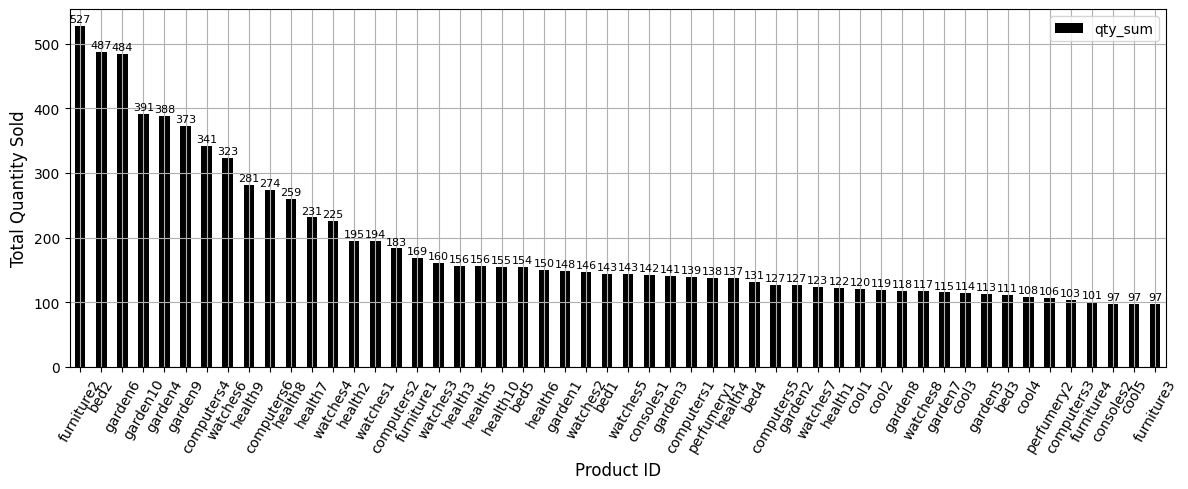

In [ ]:
product_stats = df.groupby('product_id').agg({
    'qty': ['sum', 'mean', 'std'],
    'unit_price': ['mean', 'std'],
    'total_price': 'sum',
    'month_year': ['min', 'max', 'nunique']  }).reset_index()

product_stats.columns = ['_'.join(col).strip() for col in product_stats.columns.values]
product_stats = product_stats.rename(columns={'product_id_': 'product_id'})

product_stats['total_revenue'] = product_stats['total_price_sum']
product_stats['avg_order_size'] = product_stats['qty_mean']
product_stats['price_variability'] = product_stats['unit_price_std'] / product_stats['unit_price_mean']
product_stats['sales_cv'] = product_stats['qty_std'] / product_stats['qty_mean']  # Coefficient of variation

all_products = product_stats.sort_values('qty_sum', ascending=False)

# # Display all products
# pd.set_option('display.max_rows', None)  # Show all rows
# print("Complete Product Analysis:")
# display(all_products)
# pd.reset_option('display.max_rows')  # Reset display option

plt.figure(figsize=(12, 8))
ax = all_products.plot(x='product_id', y='qty_sum', kind='bar',
                      # title='All Products by Total Quantity Sold',
                      figsize=(12, 5), color='k')

plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xlabel('Product ID', fontsize=12)
plt.grid()

ax.set_xticklabels(all_products['product_id'], rotation=60, ha='center', fontsize=10)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
df.tail(2)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.2875,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.1000,199.509804


In [ ]:
df.shape

(676, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [ ]:
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

In [ ]:
monthly_demand = (
    df.groupby(['product_id', 'month_year'])['qty']
    .sum()
    .reset_index()
    .rename(columns={'qty': 'Monthly_Demand'}))


In [ ]:
valid_products = monthly_demand.groupby('product_id').filter(lambda x: x['Monthly_Demand'].count() >= 3)


In [ ]:
cv_stats = (
    valid_products
    .groupby('product_id')['Monthly_Demand']
    .agg(['mean', 'std'])
    .reset_index())
cv_stats = cv_stats[cv_stats['mean'] > 0]
cv_stats['CV'] = cv_stats['std'] / cv_stats['mean']



In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

def safe_ljung_box(ts, max_lag=4):
    ts = ts.dropna()
    if len(ts) < 5 or ts.sum() == 0:
        return np.nan
    lags = min(max_lag, len(ts) - 1)
    try:
        result = acorr_ljungbox(ts, lags=[lags], return_df=True)
        return result['lb_pvalue'].iloc[0]
    except:
        return np.nan

ljung_results = (
    valid_products
    .groupby('product_id')['Monthly_Demand']
    .apply(lambda x: safe_ljung_box(x, max_lag=4))
    .reset_index(name='Ljung_pvalue'))
summary = pd.merge(cv_stats[['product_id', 'CV']], ljung_results, on='product_id')

summary['CV_Flag'] = np.where(summary['CV'] >= 0.5, 'High Variability', 'Low/Moderate Variability')
summary['Ljung_Flag'] = np.where(summary['Ljung_pvalue'] > 0.05, 'Random', 'Autocorrelated')

def classify_demand(row):
    if row['CV_Flag'] == 'High Variability' and row['Ljung_Flag'] == 'Random':
        return 'Highly Stochastic'
    elif row['CV_Flag'] == 'Low/Moderate Variability' and row['Ljung_Flag'] == 'Random':
        return 'Moderately Stochastic'
    elif row['Ljung_Flag'] == 'Autocorrelated':
        return 'Deterministic or Patterned'
    else:
        return 'Uncertain'

summary['Demand_Type'] = summary.apply(classify_demand, axis=1)
summary

,product_id,CV,Ljung_pvalue,CV_Flag,Ljung_Flag,Demand_Type
0,bed1,0.714063,0.036613,High Variability,Autocorrelated,Deterministic or Patterned
1,bed2,0.662889,0.105471,High Variability,Random,Highly Stochastic
2,bed3,0.570065,0.777323,High Variability,Random,Highly Stochastic
3,bed4,0.823304,0.211229,High Variability,Random,Highly Stochastic
4,bed5,0.822461,0.344863,High Variability,Random,Highly Stochastic
5,computers1,1.052972,0.695802,High Variability,Random,Highly Stochastic
6,computers2,1.130222,0.339279,High Variability,Random,Highly Stochastic
7,computers3,0.593302,0.537921,High Variability,Random,Highly Stochastic
8,computers4,0.845054,0.000463,High Variability,Autocorrelated,Deterministic or Patterned
9,computers5,1.391720,0.338313,High Variability,Random,Highly Stochastic


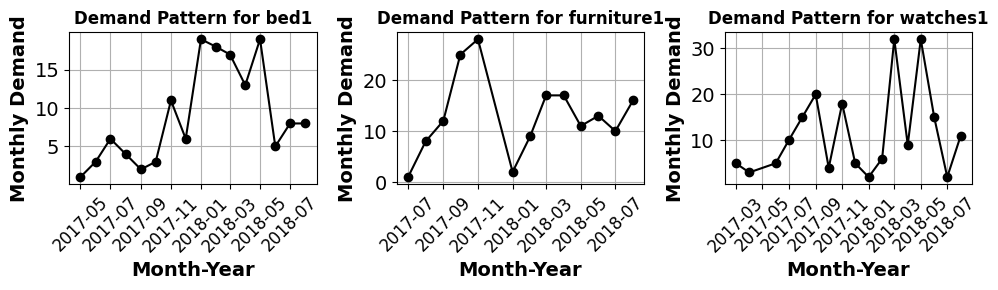

In [ ]:
sample_ids = ['bed1', 'furniture1', 'watches1']
fig, axes = plt.subplots(1, len(sample_ids), figsize=(10, 3)) # Adjust figsize as needed

for i, pid in enumerate(sample_ids):
    series = monthly_demand[monthly_demand['product_id'] == pid]
    axes[i].plot(series['month_year'], series['Monthly_Demand'], marker='o', color='k')
    axes[i].set_title(f"Demand Pattern for {pid}", fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=14)
    axes[i].set_xlabel("Month-Year", fontsize=14, fontweight='bold')
    axes[i].set_ylabel("Monthly Demand", fontsize=14, fontweight='bold')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## Environment: RetailEnv simulates inventory dynamics and pricing effects.

Agents:

- Rule-based (heuristic pricing)
- Genetic algorithm
- Bayesian optimization
- DQN (Deep Q-Network)

Execution: Each agent interacts with the environment sequentially, not concurrently.

In [ ]:
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from collections import defaultdict
# import random
# from tqdm import tqdm
# import matplotlib.pyplot as plt



# Convert date and extract temporal features
df['month_year'] = pd.to_datetime(df['month_year'])
df['week'] = df['month_year'].dt.isocalendar().week
df['year'] = df['month_year'].dt.isocalendar().year


product_reference_prices = df.groupby('product_id')['unit_price'].mean().to_dict()


def get_weekly_demand(product_id, min_weeks=8, min_demand=5):
    """Get weekly demand with guaranteed valid output"""
    try:
        weekly = (df[df['product_id'] == product_id]
                  .groupby(['year', 'week'])['qty']
                  .sum()
                  .reset_index()
                  .sort_values(['year', 'week']))

        if len(weekly) < min_weeks:
            print(f"Generating synthetic demand for {product_id} (insufficient data)")
            demand_series = [max(min_demand, int(np.random.poisson(15))) for _ in range(min_weeks)]
        else:
            demand_series = weekly['qty'].values.tolist()
            demand_series = [max(min_demand, d) for d in demand_series]

        ref_price = product_reference_prices.get(product_id, 10.0)
        return demand_series, ref_price

    except Exception as e:
        print(f"Error processing demand data: {str(e)}")
        return [max(min_demand, int(np.random.poisson(15))) for _ in range(min_weeks)], 10.0


Analyzing product: furniture1
Reference price: 36.75
Demand series length: 13 weeks
Sample demand values: [5, 8, 12, 25, 28]...

Running optimizations...
|   iter    |  target   |   price   |
-------------------------------------
| 1         | 6225.3939 | 34.905009 |
| 2         | 6080.6762 | 43.374592 |
| 3         | 6189.6039 | 40.159470 |
| 4         | 6190.3235 | 38.199480 |
| 5         | 6034.1838 | 31.692810 |
| 6         | 6194.0819 | 36.234897 |
| 7         | 6234.2044 | 33.906872 |
| 8         | 5868.0568 | 29.399384 |
| 9         | 6244.7402 | 34.306373 |
| 10        | 6145.1124 | 41.435561 |
| 11        | 6252.5942 | 34.407025 |
| 12        | 6175.8490 | 37.211314 |
| 13        | 6220.9431 | 39.190850 |
| 14        | 6193.3750 | 33.023923 |
| 15        | 6077.2768 | 44.099076 |
| 16        | 6218.6883 | 33.496266 |
| 17        | 6183.7113 | 38.757600 |
| 18        | 6200.1516 | 39.632990 |
| 19        | 6126.2362 | 42.309599 |
| 20        | 6221.8038 | 35.636530 |

Episode 

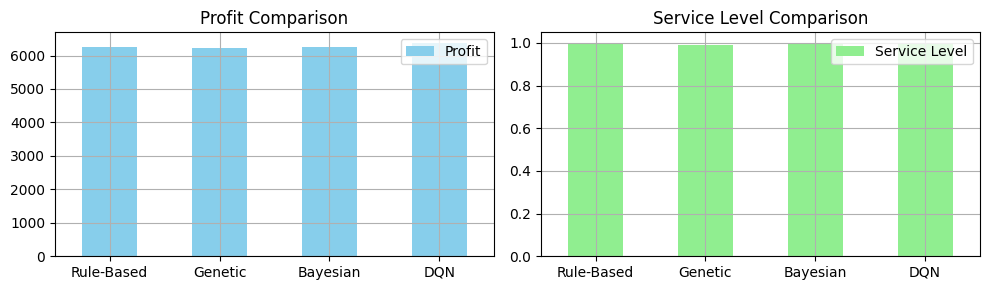

In [ ]:
class RetailEnv:
    def __init__(self, demand_series, ref_price, init_inventory=100, lead_time=2,
                 elasticity=-0.8, holding_rate=0.1, stockout_penalty=1.0,
                 order_cost=0.5, z_score=1.28):

        # Guarantee valid demand series
        if not isinstance(demand_series, list) or len(demand_series) < 4:
            self.original_demand = [max(5, int(np.random.poisson(15))) for _ in range(8)]
        else:
            self.original_demand = [max(1, int(d)) for d in demand_series]

        self.ref_price = max(0.1, float(ref_price))
        self.weeks = len(self.original_demand)
        self.init_inventory = max(0, int(init_inventory))
        self.lead_time = min(max(1, int(lead_time)), self.weeks-1)

        # Set parameters with validation
        self.elasticity = max(-5.0, min(0.0, float(elasticity)))  # Negative elasticity
        self.holding_rate = max(0.0, float(holding_rate))
        self.stockout_penalty = max(0.0, float(stockout_penalty))
        self.order_cost = max(0.0, float(order_cost))
        self.z_score = max(0.0, float(z_score))

        # Calculate demand variability
        if self.weeks > self.lead_time:
            lead_time_demands = [sum(self.original_demand[i:i+self.lead_time])
                               for i in range(len(self.original_demand)-self.lead_time)]
            self.std_demand_lead_time = np.std(lead_time_demands) if len(lead_time_demands) > 1 else 5.0
        else:
            self.std_demand_lead_time = np.std(self.original_demand) if len(self.original_demand) > 1 else 5.0

        self.reset()

    def reset(self):
        self.current_week = 0
        self.inventory = self.init_inventory
        self.pending_orders = []
        self.stockouts = 0
        self.total_profit = 0
        self.total_demand = 0
        self.total_sales = 0
        return self

    def step(self, price):
        if self.current_week >= self.weeks:
            return 0

        # Get current demand with price elasticity
        base_demand = self.original_demand[self.current_week]
        demand = max(1, base_demand * (max(0.1, price) / self.ref_price) ** self.elasticity)

        # Inventory replenishment logic
        forecasted_demand = demand * self.lead_time
        safety_stock = self.z_score * self.std_demand_lead_time
        target_inventory_level = forecasted_demand + safety_stock
        order_qty = max(0, round(target_inventory_level - self.inventory))

        # Business calculations
        sales_qty = min(self.inventory, demand)
        revenue = sales_qty * price
        holding_cost = self.inventory * self.holding_rate
        stockout_cost = max(demand - sales_qty, 0) * self.stockout_penalty
        order_cost = order_qty * self.order_cost

        # Update state
        profit = revenue - holding_cost - stockout_cost - order_cost
        self.total_profit += profit
        self.inventory -= sales_qty

        if order_qty > 0:
            self.pending_orders.append((self.current_week + self.lead_time, order_qty))

        # Receive pending orders
        arrived = sum(q for t, q in self.pending_orders if t == self.current_week)
        self.inventory += arrived
        self.pending_orders = [(t, q) for t, q in self.pending_orders if t > self.current_week]

        # Update metrics
        self.stockouts += max(0, demand - sales_qty)
        self.total_sales += sales_qty
        self.total_demand += demand
        self.current_week += 1

        return profit

    def service_level(self):
        return self.total_sales / self.total_demand if self.total_demand > 0 else 0

# ==========================
# OPTIMIZATION STRATEGIES
# ==========================

def monte_carlo_simulation(price, demand_series, ref_price, runs=10000):
    profits = []
    services = []
    for _ in range(runs):
        env = RetailEnv(demand_series, ref_price)
        for week in range(env.weeks):
            env.step(price)
        profits.append(env.total_profit)
        services.append(env.service_level())
    return np.mean(profits), np.mean(services)

def optimize_inventory(demand_series, ref_price):
    price_options = np.linspace(max(0.1, ref_price * 0.8), ref_price * 1.2, 10)
    results = []
    for price in price_options:
        avg_profit, avg_service = monte_carlo_simulation(price, demand_series, ref_price)
        results.append((price, avg_profit, avg_service))
    return pd.DataFrame(results, columns=["Price", "AvgProfit", "ServiceLevel"])

def genetic_optimization(demand_series, ref_price):
    bounds = [(max(0.1, ref_price * 0.8), ref_price * 1.2)]
    def objective(x):
        price = x[0]
        profit, _ = monte_carlo_simulation(price, demand_series, ref_price)
        return -profit
    result = differential_evolution(objective, bounds)
    best_price = result.x[0]
    profit, service = monte_carlo_simulation(best_price, demand_series, ref_price)
    return (best_price,), profit, service

def bayesian_optimization(demand_series, ref_price):
    def objective(price):
        profit, _ = monte_carlo_simulation(price, demand_series, ref_price)
        return profit
    pbounds = {'price': (max(0.1, ref_price * 0.8), ref_price * 1.2)}
    optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
    optimizer.maximize(init_points=5, n_iter=15)
    best_price = optimizer.max['params']['price']
    final_profit, service = monte_carlo_simulation(best_price, demand_series, ref_price)
    return {"params": optimizer.max['params'], "target": final_profit, "service_level": service}

class DQNAgent:
    def __init__(self, state_size=2, action_size=10, hidden_size=32, lr=0.001):
        self.model = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, action_size))
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.995
        self.action_size = action_size

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_size)
        state = torch.FloatTensor(state)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def remember(self, state, action, reward, next_state):
        self.memory.append((state, action, reward, next_state))

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size)

        states = torch.FloatTensor([t[0] for t in batch])
        actions = torch.LongTensor([t[1] for t in batch])
        rewards = torch.FloatTensor([t[2] for t in batch])
        next_states = torch.FloatTensor([t[3] for t in batch if t[3] is not None])

        current_q = self.model(states).gather(1, actions.unsqueeze(1))

        non_final_mask = torch.tensor([t[3] is not None for t in batch], dtype=torch.bool)
        next_q = torch.zeros(batch_size)
        next_q[non_final_mask] = self.model(next_states).max(1)[0].detach()

        target_q = rewards + self.gamma * next_q

        loss = nn.MSELoss()(current_q.squeeze(), target_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

def dqn_optimization(demand_series, ref_price, episodes=30, log_frequency=5):
    """Run DQN optimization with detailed logging"""
    # Guarantee valid demand series
    if not isinstance(demand_series, list) or len(demand_series) < 4:
        demand_series = [max(5, int(np.random.poisson(15))) for _ in range(8)]

    price_bins = np.linspace(max(0.1, ref_price * 0.8), ref_price * 1.2, 10)
    agent = DQNAgent()

    best_profit = -np.inf
    best_service = 0
    best_episode_log = None

    for ep in range(episodes):
        env = RetailEnv(demand_series, ref_price)
        state = [env.inventory, demand_series[0]]
        total_profit = 0
        episode_log = []

        for week in range(env.weeks):
            action = agent.select_action(state)
            price = price_bins[action]
            profit = env.step(price)
            total_profit += profit

            # Log current decision
            log_entry = {
                'episode': ep + 1,
                'week': week + 1,
                'price': round(price, 2),
                'inventory': env.inventory,
                'demand': demand_series[week],
                'profit': round(profit, 2),
                'action': action}
            episode_log.append(log_entry)

             next_week = week + 1 if week + 1 < env.weeks else None
            next_demand = demand_series[next_week] if next_week is not None else None
            next_state = [env.inventory, next_demand] if next_demand is not None else None

            agent.remember(state, action, profit, next_state)
            if next_week is not None:
                state = [env.inventory, demand_series[next_week]]

        agent.replay()

        if (ep + 1) % log_frequency == 0 or (ep + 1) == episodes:
            print(f"\nEpisode {ep + 1}/{episodes} Summary:")
            print(f"Total Profit: ${total_profit:.2f} | Service Level: {env.service_level():.2%}")
            print("Last 5 Decisions:")
            for decision in episode_log[-5:]:
                print(f"Week {decision['week']}: Price=${decision['price']} | "
                      f"Inventory={decision['inventory']} | Demand={decision['demand']} | "
                      f"Profit=${decision['profit']}")

        if total_profit > best_profit:
            best_profit = total_profit
            best_service = env.service_level()
            best_episode_log = episode_log

    # Print best episode details
    if best_episode_log:
        print("\n=== BEST EPISODE DETAILS ===")
        print(f"Profit: ${best_profit:.2f} | Service Level: {best_service:.2%}")
        print("Key Decisions:")
        for i in range(0, len(best_episode_log), max(1, len(best_episode_log)//5)):
            decision = best_episode_log[i]
            print(f"Week {decision['week']}: Price=${decision['price']} | "
                  f"Inventory={decision['inventory']} | Demand={decision['demand']}")

    return best_profit, best_service

if __name__ == '__main__':
    product_id = "furniture1"

    demand_series, ref_price = get_weekly_demand(product_id)

    print(f"\nAnalyzing product: {product_id}")
    print(f"Reference price: {ref_price:.2f}")
    print(f"Demand series length: {len(demand_series)} weeks")
    print(f"Sample demand values: {demand_series[:5]}...")

    try:
        print("\nRunning optimizations...")
        rule_df = optimize_inventory(demand_series, ref_price)
        ga_result = genetic_optimization(demand_series, ref_price)
        bayes_result = bayesian_optimization(demand_series, ref_price)
        dqn_result = dqn_optimization(demand_series, ref_price, episodes=30)

         def summarize_results():
            best_rule = rule_df.loc[rule_df["AvgProfit"].idxmax()]
            return pd.DataFrame([
                {"Strategy": "Rule-Based", "Best Price": best_rule["Price"],
                 "Profit": best_rule["AvgProfit"], "Service Level": best_rule["ServiceLevel"]},
                {"Strategy": "Genetic", "Best Price": round(ga_result[0][0], 2),
                 "Profit": ga_result[1], "Service Level": ga_result[2]},
                {"Strategy": "Bayesian", "Best Price": round(bayes_result["params"]["price"], 2),
                 "Profit": bayes_result["target"], "Service Level": bayes_result["service_level"]},
                {"Strategy": "DQN", "Best Price": "Dynamic",
                 "Profit": dqn_result[0], "Service Level": dqn_result[1]}])

        results = summarize_results()
        print("\nOptimization Results:")
        print(results)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
        results.plot(x="Strategy", y="Profit", kind="bar", ax=ax1, color='skyblue', title="Profit Comparison")
        ax1.grid()
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, horizontalalignment='center')
        ax1.set_xlabel('')

        results.plot(x="Strategy", y="Service Level", kind="bar", ax=ax2, color='lightgreen', title="Service Level Comparison")
        ax2.grid()
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, horizontalalignment='center')
        ax2.set_xlabel('')
        ax2.set_ylim(0, 1.05)

        plt.tight_layout()
        plt.show()

        # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        # results.plot(x="Strategy", y="Profit", kind="bar", ax=ax1, color='skyblue', title="Profit Comparison")
        # results.plot(x="Strategy", y="Service Level", kind="bar", ax=ax2, color='lightgreen', title="Service Level Comparison")
        # plt.tight_layout()
        # plt.show()

    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        print("Running fallback single simulation...")
        env = RetailEnv(demand_series, ref_price)
        for week in range(env.weeks):
            profit = env.step(ref_price)
            print(f"Week {week+1}: Profit = {profit:.2f}")
        print(f"\nTotal Profit: {env.total_profit:.2f}")
        print(f"Service Level: {env.service_level():.2%}")